<a href="https://colab.research.google.com/github/sarahkaarina/lazy-language/blob/main/vectorizing/creating_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating word embeddings

**This basic notebook will talk you through how to create word embeddings**

*What is a word embedding?*

A word embedding simply refers to the vector representation of a word.

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# libraries for calculatine cosine similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

# using GPT-2
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel

# plotting
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter

<ipython-input-16-fcd744c6de3a>:15: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


**Step 1**

Create a semi-random list of words to vectorize.

In [3]:
# Create random list of words

animals = ['cat', 'dog', 'sheep', 'cow', 'moose', 'leaopard', 'fish']
vegetables = ['onion', 'cucumber', 'zucchini', 'tomato', 'cabbage', 'carrot', 'broccoli']
clothing_items = ['dress', 'shirt', 'pants', 'jeans', 'jumper', 'jacket', 'tie', 'skirt']

random_words = list(animals + vegetables + clothing_items)

# check length to make sure we have the same number of words in our embeddings
len(random_words)

22

**Step 2**

Vectorize/embed words.

In [4]:
model = 'gpt2'
logit_model = GPT2LMHeadModel
tokenizer_model = GPT2Tokenizer

tokenizer = tokenizer_model.from_pretrained(model)
model = logit_model.from_pretrained(model)

input = tokenizer.encode(random_words, add_prefix_space = "True")

embeddings = model.transformer.wte.weight[input, :]

# Let's check what they look like!
embeddings

# Let's also check we have all 22 words in here
print(embeddings.size())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

torch.Size([22, 768])


**Step 3**

Compute cosine similarities and plot resulting heatmap.

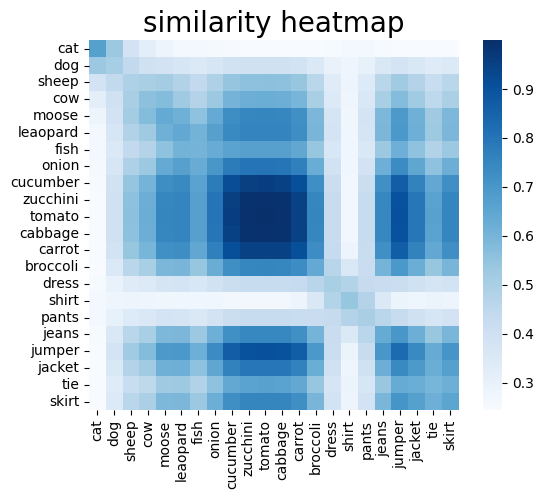

In [22]:
# Numpify them so you can calculate cosine similarity

numpy_embeddings = embeddings.squeeze().detach().numpy()

# Compute cosine similarity

similarity_distribution = np.around(1-pairwise_distances(numpy_embeddings, metric=cosine), 2)
similarity_dataframe = pd.DataFrame(data = similarity_distribution)

similarity_dataframe.rank()

# Plot heatmap
cmap = 'Blues'

smooth_similarity = gaussian_filter(similarity_dataframe, sigma=1)

plt.figure()
plt.title("similarity heatmap", fontsize =20)
sns.heatmap(smooth_similarity, cmap = cmap, square=True, cbar=True, xticklabels = random_words, yticklabels = random_words)

plt.show()

In [20]:
similarity_dataframe

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.00,0.38,0.20,0.40,0.20,0.20,0.27,0.20,0.20,0.20,...,0.20,0.20,0.21,0.27,0.24,0.20,0.20,0.20,0.22,0.20
1,0.38,1.00,0.20,0.37,0.20,0.20,0.35,0.20,0.20,0.20,...,0.20,0.20,0.30,0.35,0.31,0.20,0.20,0.20,0.30,0.20
2,0.20,0.20,1.00,0.18,1.00,1.00,0.18,1.00,1.00,1.00,...,1.00,1.00,0.18,0.16,0.18,1.00,1.00,1.00,0.17,1.00
3,0.40,0.37,0.18,1.00,0.18,0.18,0.33,0.18,0.18,0.18,...,0.18,0.18,0.25,0.37,0.28,0.18,0.18,0.18,0.23,0.18
4,0.20,0.20,1.00,0.18,1.00,1.00,0.18,1.00,1.00,1.00,...,1.00,1.00,0.18,0.16,0.18,1.00,1.00,1.00,0.17,1.00
5,0.20,0.20,1.00,0.18,1.00,1.00,0.18,1.00,1.00,1.00,...,1.00,1.00,0.18,0.16,0.18,1.00,1.00,1.00,0.17,1.00
6,0.27,0.35,0.18,0.33,0.18,0.18,1.00,0.18,0.18,0.18,...,0.18,0.18,0.35,0.27,0.28,0.18,0.18,0.18,0.26,0.18
7,0.20,0.20,1.00,0.18,1.00,1.00,0.18,1.00,1.00,1.00,...,1.00,1.00,0.18,0.16,0.18,1.00,1.00,1.00,0.17,1.00
8,0.20,0.20,1.00,0.18,1.00,1.00,0.18,1.00,1.00,1.00,...,1.00,1.00,0.18,0.16,0.18,1.00,1.00,1.00,0.17,1.00
9,0.20,0.20,1.00,0.18,1.00,1.00,0.18,1.00,1.00,1.00,...,1.00,1.00,0.18,0.16,0.18,1.00,1.00,1.00,0.17,1.00
